In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv('data.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         501 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


# MISSING ATTRIBUTES

In [5]:
housing['RM'] = housing['RM'].fillna(housing['RM'].mean())

In [6]:
# checking which data can be categorical
columns = housing.columns
for column in columns:
    print(column)
    print(len(housing[column].value_counts()))

CRIM
504
ZN
26
INDUS
76
CHAS
2
NOX
81
RM
442
AGE
356
DIS
412
RAD
9
TAX
66
PTRATIO
46
B
357
LSTAT
455
MEDV
229


In [7]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [8]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702085,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


C:\Users\daisycharlie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


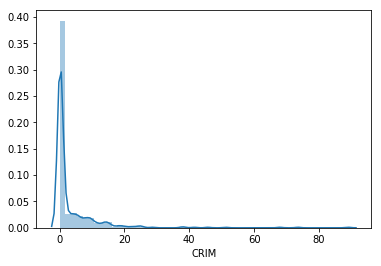

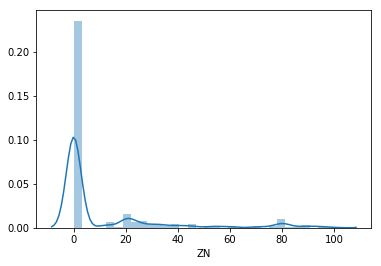

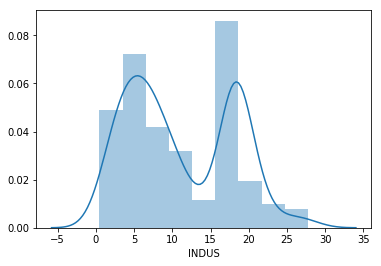

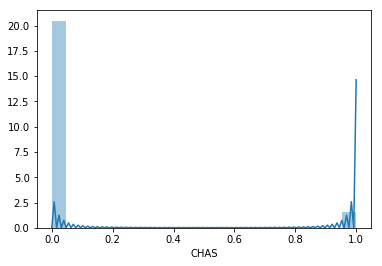

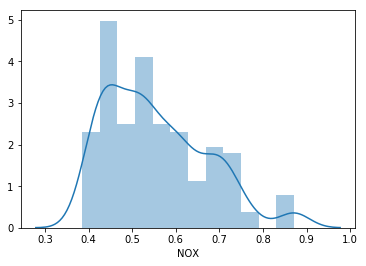

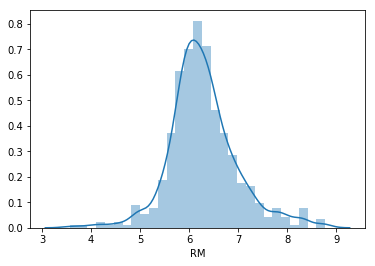

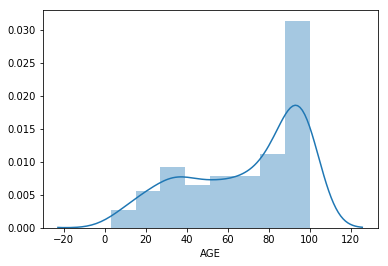

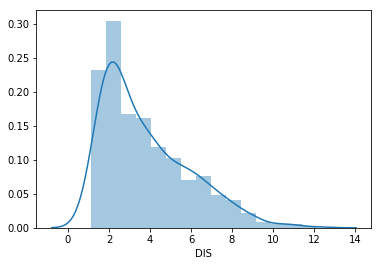

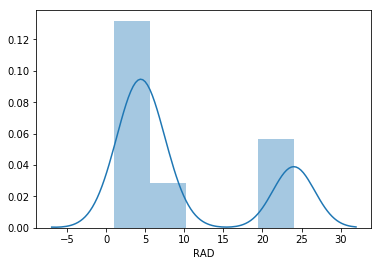

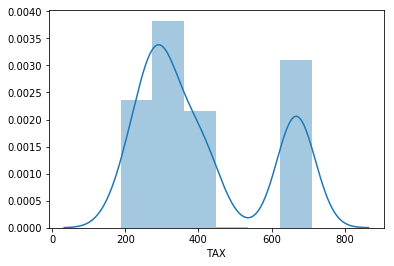

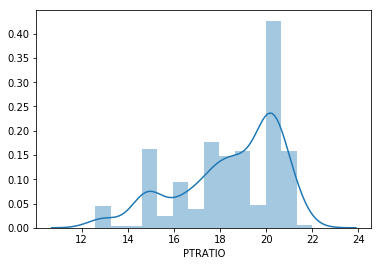

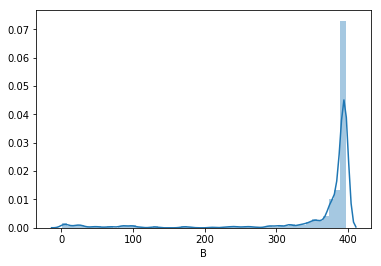

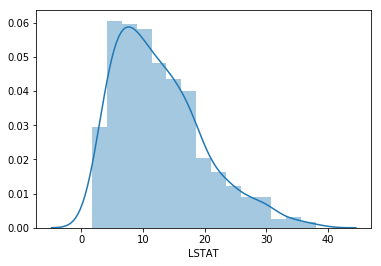

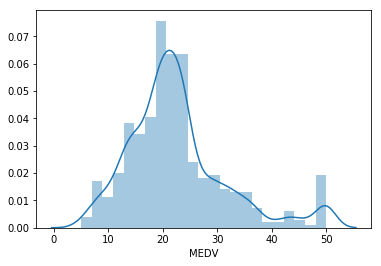

In [9]:
#checking distribution of each column
for col in columns:
    plt.figure()
    sns.distplot(housing[col])

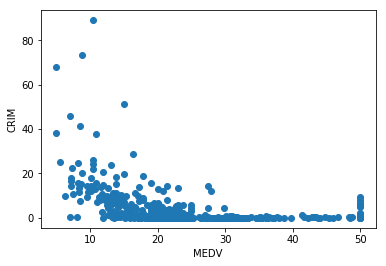

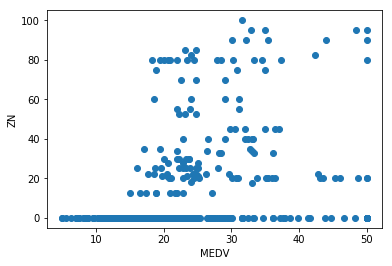

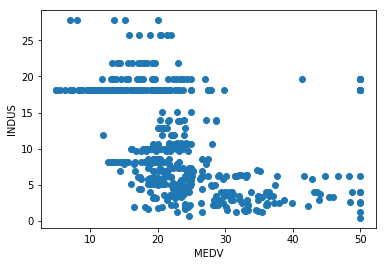

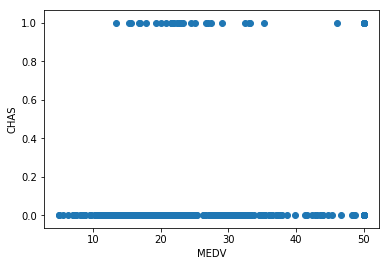

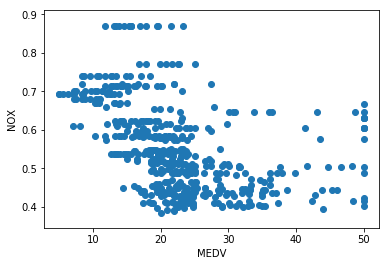

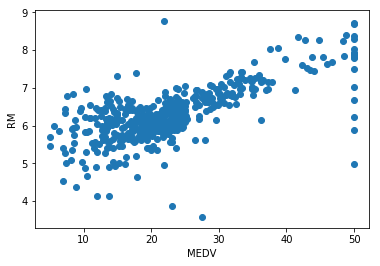

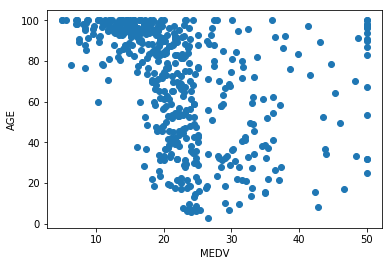

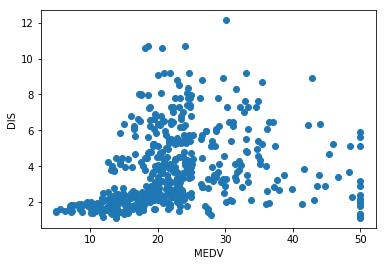

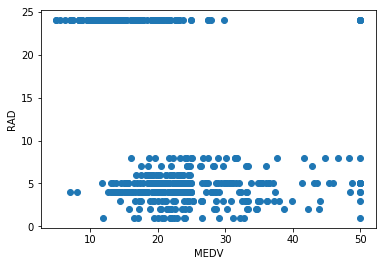

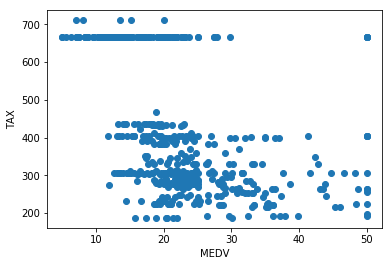

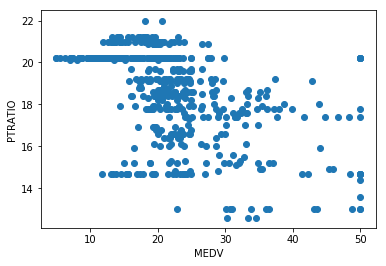

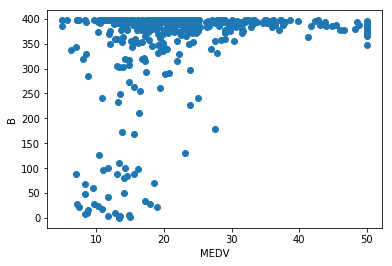

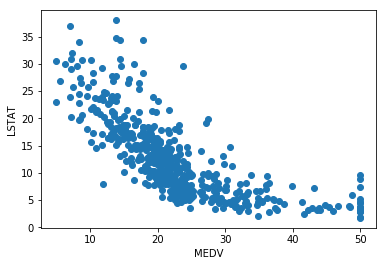

In [10]:
#let us compare price with all other columns
for col in columns:
    if col != 'MEDV':
        plt.figure()
        plt.scatter(housing['MEDV'],housing[col])
        plt.xlabel('MEDV')
        plt.ylabel(col)

In [11]:
medvList = housing['MEDV'].tolist()
corrList = {}
for col in columns:
    trialList = housing[col].tolist()
    trialDf = pd.DataFrame({
        'MEDV':medvList,col:trialList
    })
    corrDf = trialDf.corr()
    corrList[col] = abs(corrDf[col][0])
import operator
sorted_x = sorted(corrList.items(), key=operator.itemgetter(1),reverse=True)
pd.DataFrame(sorted_x,columns=['Parameter', 'correlation'])

,Parameter,correlation
0,MEDV,1.000000
1,LSTAT,0.737663
2,RM,0.695375
3,PTRATIO,0.507787
4,INDUS,0.483725
5,TAX,0.468536
6,NOX,0.427321
7,CRIM,0.388305
8,RAD,0.381626
9,AGE,0.376955


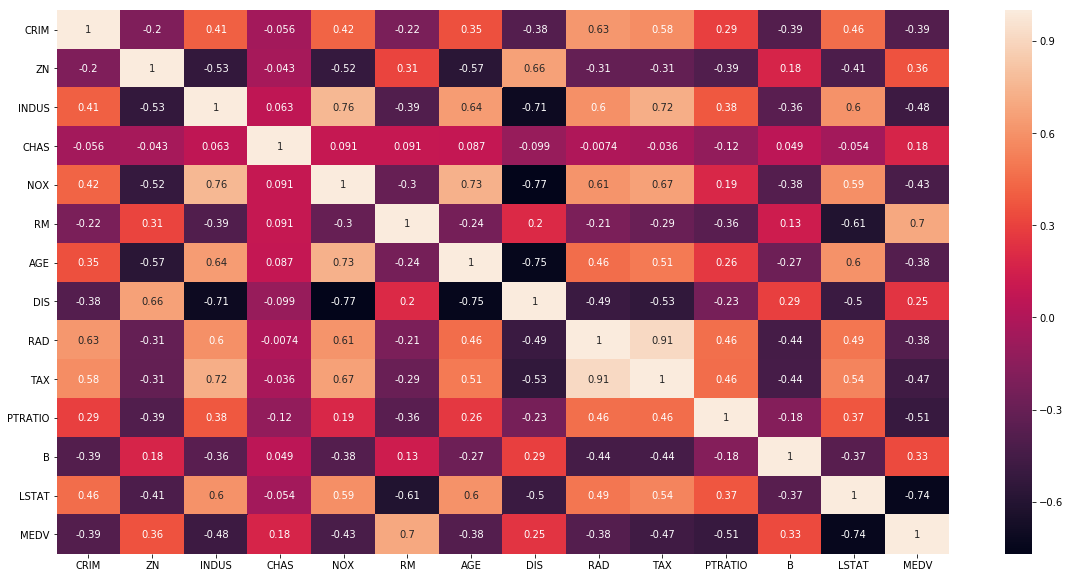

In [12]:
figure = plt.subplots(figsize=(20,10))
sns.heatmap(housing.corr(),annot=True)

In [13]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# TRAIN TEST SPLIT DATA

In [14]:

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [15]:
#train_set, test_set = split_train_test(housing,0.2)

In [16]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,
                                                   random_state=42)

In [17]:
train_set['CHAS'].value_counts()

0    375
1     29
Name: CHAS, dtype: int64

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [19]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [20]:
housing = strat_train_set.copy()

# LOOKING FOR CORRELATIONS

In [21]:
corr_matrix = housing.corr()
corrAbs = corr_matrix['MEDV'].apply(lambda x:abs(x))
corrAbs.sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.740494
RM         0.679903
PTRATIO    0.493534
INDUS      0.473516
TAX        0.456657
NOX        0.422873
CRIM       0.393715
RAD        0.374693
AGE        0.364596
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AFB65EF588>,
      dtype=object)

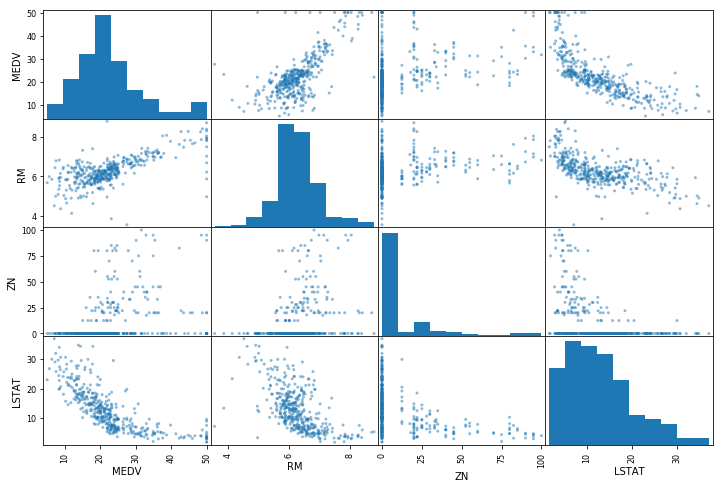

In [22]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV','RM','ZN','LSTAT']
scatter_matrix(housing[attributes],figsize=(12,8))

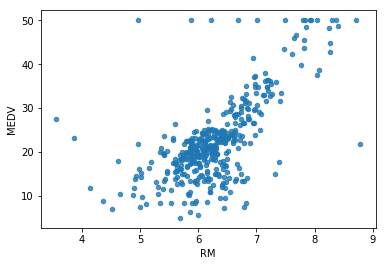

In [23]:
housing.plot(kind='scatter',x='RM',y='MEDV',alpha=0.8)

## TRYING OUT ATTRIBUTE COMBINATIONS

In [24]:
housing['TAXRM'] = housing['TAX']/housing['RM']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [25]:
corr_matrix = housing.corr()
corrAbs = corr_matrix['MEDV'].apply(lambda x:abs(x))
corrAbs.sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.740494
RM         0.679903
TAXRM      0.525086
PTRATIO    0.493534
INDUS      0.473516
TAX        0.456657
NOX        0.422873
CRIM       0.393715
RAD        0.374693
AGE        0.364596
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
Name: MEDV, dtype: float64

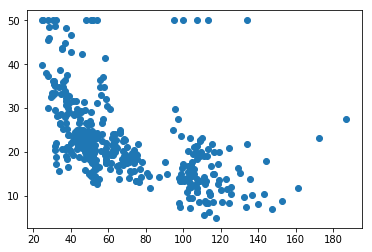

In [26]:
plt.scatter(housing['TAXRM'],housing['MEDV'])

In [27]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279541,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.483262
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712324,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.456889
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,44.790353
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.217500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,53.947454
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


In [28]:
housing_tr = housing.copy()

# CREATING PIPELINE

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])


In [30]:
strat_test_set['TAXRM'] = strat_test_set['TAX']/strat_test_set['RM']
housing_num_tr = my_pipeline.fit_transform(housing_tr)
strat_test_set = my_pipeline.transform(strat_test_set)
#strat_test_set.shape

## SELECTING DESIRED MODEL

### LINEAR REGRESSION

In [31]:
FinalTrainDate = pd.DataFrame(housing_num_tr,columns=housing.columns)
strat_test_set = pd.DataFrame(strat_test_set,columns=housing.columns)
train_x = pd.DataFrame(housing_num_tr,columns=housing.columns)
train_x = train_x.drop('MEDV',axis=1)
train_y = pd.DataFrame(FinalTrainDate['MEDV'].tolist(),columns=['MEDV'])

test_x = strat_test_set.drop('MEDV',axis=1)
test_y = pd.DataFrame(strat_test_set['MEDV'].tolist(),columns=['MEDV'])

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(train_x,train_y)

C:\Users\daisycharlie\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\daisycharlie\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [44]:
y_pred = model.predict(test_x)

C:\Users\daisycharlie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


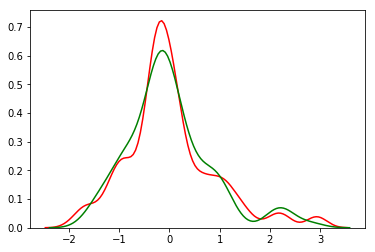

In [45]:
sns.distplot(test_y,hist=False,color='red')
sns.distplot(y_pred,hist=False,color='green')